In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sys
sys.path.append("../../../") 

from utils.paths import make_dir_line

modality = 'c'
project = 'Database Design'
data = make_dir_line(modality, project)

raw = data('raw')

In [5]:
import sqlite3

conn = sqlite3.connect(":memory:")  ## aca se indica el nombre de la db.
cur = conn.cursor()

# 7.2.0_Database Schemas and Normalization

## 7.2.2 Running from star to snowflake

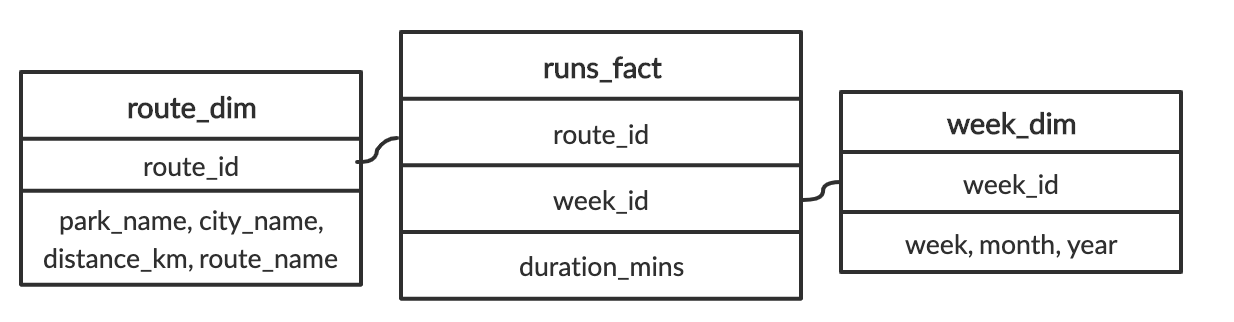

## 7.2.3 Which is better?

After learning about the snowflake schema, you convert the current star schema into a snowflake schema. To do this, you normalize route_dim and week_dim. Which option best describes the resulting new tables after doing this?

The tables runs_fact, route_dim, and week_dim have been loaded.

R:/ Week_dim is extended two dimensions with new tables for month and year. route_dim is extended two dimensions with new tables for city and park. month, year, city, and park are indeed repeated often. year and city would extend month and park, respectively.


In [ ]:
conn.executescript(
    """
    
    DROP TABLE IF EXISTS runs_fact;

    CREATE TABLE runs_fact (
        route_id INTEGER NOT NULL,
        week_id INTEGER NOT NULL,
        duration_mins FLOAT NOT NULL
    );
    
    DROP TABLE IF EXISTS week_dim;
    
    CREATE TABLE week_dim(
        week_id INTEGER PRIMARY KEY,
        week INTEGER NOT NULL,
        month VARCHAR(160) NOT NULL,
        year INTEGER NOT NULL
    );
    
    DROP TABLE IF EXISTS route_dim;
    
    CREATE TABLE route_dim(
        route_id INTEGER PRIMARY KEY,
        park_name VARCHAR(160) NOT NULL,
        city_name VARCHAR(160) NOT NULL,
        distance_km FLOAT NOT NULL,
        route_name VARCHAR(160) NOT NULL
    );

    """
)
conn.commit()

In [ ]:
df = pd.read_csv(raw / 'runs_fact.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
runs_fact = list(zip(df.route_id, df.week_id, df.duration_mins))
cur.executemany("INSERT INTO runs_fact VALUES  (?,?,?)", runs_fact)

df = pd.read_csv(raw / 'week_dim.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
week_dim = list(zip(df.week_id, df.week, df.month, df.year))
cur.executemany("INSERT INTO week_dim VALUES  (?,?,?,?)", week_dim)

df = pd.read_csv(raw / 'route_dim.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
route_dim = list(zip(df.route_id, df.park_name, df.city_name, df.distance_km, df.route_name))
cur.executemany("INSERT INTO route_dim VALUES  (?,?,?,?,?)", route_dim)

## 7.1.12 Querying the dimensional model

In [12]:
# -- Select the sum of the duration of all runs
cur.execute("""
            
            SELECT SUM (duration_mins)
            FROM runs_fact;

            """).fetchall()

[(1172.1599999999999,)]

In [13]:
# -- Get the total duration of all runs, Get all the week_id's that are from July, 2019
cur.execute("""
            
            SELECT SUM(duration_mins)
            FROM runs_fact
            INNER JOIN week_dim ON runs_fact.week_id = week_dim.week_id
            WHERE month = 'July' and year = '2019';

            """).fetchall()

[(381.46000000000004,)]

In [14]:
print('Ok_')

Ok_
